# Simuleer een epidemie

In dit project zullen we bestuderen hoe ziektes zich kunnen verspreiden doorheen een (sociaal) netwerk. We zullen onderzoeken hoe de structuur van een netwerk een invloed kan hebben op hoe snel een ziekte doorgegeven wordt. Finaal zullen we ook verschillende strategiën bekijken om de verspreiding van een ziekte tegen te gaan.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Het SIR-model

Een van de eenvoudigste manieren om ziekteverspreiding in een gemeenschap te modelleren is aan de hand van het SIR-model. SIR staat voor *Susceptible* (vatbaar), *Infected* (geïnfecteerd) en *Resistant* (resistent of hersteld), de drie types individuen die in een gemeenschap voorkomen. Het SIR-model bestaat uit drie vergelijkingen die de veranderingen van het aantal individuen in een bepaalde groep beschrijven. De variabelen die de toestand beschrijven zijn:

-  $S(t)$: het aantal vatbare individuen op tijdstip $t$;
-  $I(t)$: het aantal geïnfecteerde individuen op tijdstip $t$;
-  $R(t)$: het aantal resistente individuen op tijdstip $t$.

In deze beschrijving maken we een eerste grote vereenvoudiging van de werkelijkheid. We nemen aan dat elk van deze variablen reëelwaardig zijn en dat het aantal individuen in elke groep continu kan variëren. In werkelijkheid is het aantal geïnfecteerden of vatbare individuen een natuurlijk getal, je bent immers besmet of je bent het niet. Modelleerders werken echter graag met continue variablen omdat ze dan de technieken van wiskundige analyse kunnen gebruiken.

> **Vraag 1**: Onder welke omstandigheden gaat deze continue benadering ongeveer op? Denk je dat je dit model kan gebruiken om een gezin van vier personen te beschrijven?

Deze drie variabelen worden aan elkaar gelinkt aan de hand van drie differentiaalvergelijkingen (die elk een verandering in de tijd beschrijven). Hierin nemen we aan dat de grootte van de populatie ongewijzigd blijft. We nemen dus aan dat, gedurende de tijdspanne die het model beschrijft, er niemand geboren wordt en ook niemand sterft. We zullen ons hier dus beperken tot de verspreiding van een relatief onschuldige ziekte zoals een verkoudheid. De drie vergelijkingen zijn als volgt:

$$
\frac{\text{d}S(t)}{\text{d}t} = -\beta \, S(t) \, I(t)
$$

$$
\frac{\text{d}I(t)}{\text{d}t} = \beta \, S(t) \,I(t) - \gamma \, I(t)
$$

$$
\frac{\text{d}R(t)}{\text{d}t} = \gamma \, I(t)
$$

Elke vergelijking vertelt ons hoe het aantal mensen in elke groep wijzigt doorheen de tijd. Daaruit kunnen we ook berekenen hoeveel mensen zich op een bepaald moment bevinden in elke groep. De vergelijkingen zijn gekoppeld via de *overgangssnelheden*. Elke overgangssnelheid vertelt ons hoe waarschijnlijk het is om van de ene naar de andere groep over te gaan.

De overgangssnelheid van vatbaar (S) naar geïnfecteerd (I) hangt af van het contact tussen een vatbare persoon en een geïnfecteerd persoon. We noemen deze contactsnelheid $\beta$. De kans dat de ziekte overgedragen wordt tijdens een contact tussen een vatbare en een geïnfecteerde persoon is dus $\beta \, I$. Het aantal vatbare personen (S) vermindert dus met deze snelheid op elk tijdstip.

De overgangssnelheid van geïnfecteerd (I) naar resistent (R) hangt alleen af van de snelheid van herstel, die we $\gamma$ noemen. Het aantal geïnfecteerde personen vermindert dus met deze snelheid op elk tijdstip.

> **Oefening 1**: Toon aan dat het totaal aantal individuen in de populatie $(S(t)+I(t)+R(t))$ constant zal blijven.


Het SIR-model is moeilijk om exact te worden opgelost. Dit is het geval bij veel differentiaalvergelijkingen die optreden in de biologische wetenschappen. We moeten dus een *numerieke benadering* van de oplossing vinden. Dit betekent dat we een algoritme zullen gebruiken om een geschatte maar nauwkeurige oplossing te vinden. Er zijn verschillende mogelijkheiden om dit te doen. We zouden ons continue probleem kunnen vervangen door een discrete tegenhanger. Dit zou ons toelaten bepaalde numerieke methoden te gebruiken om een benaderende oplossing te krijgen. Anderzijds kunnen we een iteratieve methode gebruiken. Uitgaande van een initiële schatting, maken iteratieve methoden opeenvolgende benaderingen die stapsgewijs convergeren naar de exacte oplossing.

Met behulp van computers is het gemakkelijk om op deze manier een numerieke oplossing voor het SIR-model te vinden. Vanuit deze oplossing kunnen we leren hoe de verschillende variabelen in de loop van de tijd veranderen. Om dit te doen, vertrekken we van een beginvoorwaarde: het is logisch om te beginnen met een populatie met nul resistente personen, een paar geïnfecteerde personen en de rest vatbaar. Vervolgens kunnen we onze numerieke oplossing gebruiken om het aantal mensen in elke groep op elke tijdstap te berekenen.

Via scipy kunnen we eenvoudig dergelijke differentiaalvergelijkingen simuleren. Eerst moeten we de differentiaalvergelijking implementeren. Dit zijn de drie functies hierboven geven samengevat in een vector. 

In [140]:
def SIR(t, y, beta, gamma):
    S, I, R = y
    return np.array([-beta * S * I,
                    beta * S * I - gamma * I,
                    gamma * I])

Daarna kunnen we hem numeriek oplossen. We beschouwen een populatie met 1000 mensen, waarvan initieel één persoon geïnfecteerd is.

In [141]:
from scipy.integrate import solve_ivp

S0 = 999
I0 = 1
R0 = 0

beta = 1e-3
gamma = 1e-1


oplossing = solve_ivp(SIR,  # functie met parameters
                      [0, 100],  # tijdsinterval waarin we simuleren
                      np.array([S0, I0, R0]),  # de initiele omstandigheden
                      args = (beta, gamma))  # de parameters van het stelsel differentiaalvergelijkingen 

TypeError: SIR() missing 2 required positional arguments: 'beta' and 'gamma'

Deze oplossing kunnen we dan plotten.

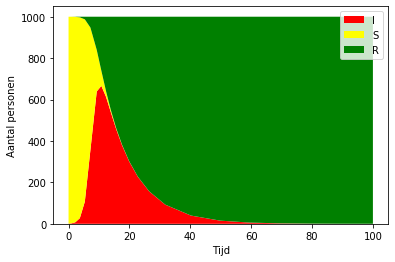

In [6]:
plt.stackplot(oplossing.t, oplossing.y[[1,0,2],:],
              labels=["I", "S", "R"],
              colors=["red", "yellow", "green"])
plt.xlabel("Tijd")
plt.ylabel("Aantal personen")
plt.legend(loc=0)

> **Vraag 3**: Wat als initieel de helft van de populatie resistent was? Wat als 80% van de populatie resistent is? Simuleer dit door de parameters aan te passen.

## Sociale netwerken

Het standaard SIR-model maakt de onrealistische veronderstelling dat twee willekeurige individuen telkens dezelfde kans hebben om met elkaar in contact te komen en zo mogelijks een ziekte door te geven. In werkelijkheid gaat natuurlijk niet iedereen met dezelfde mensen om. We hebben allemaal mensen waar we meer mee omgaan (meer in contact mee komen) dan met anderen. Het geheel van wie met wie in contact staat wordt een *sociaal netwerk* genoemd (denk aan Facebook). Het lijkt evident dat de structuur van zo'n netwerk een sterke invloed zal hebben op de dynamiek van de ziekteverspreiding. In deze sectie zullen we bekijken hoe we een netwerk wiskundig kunnen beschrijven.


### Een voorbeeld

Hieronder zie je een voorbeeld van enkele netwerken. De punten vertegenwoordigen de leerlingen en worden *knopen* genoemd. De contacten tussen leerlingen worden weergegeven door lijnsegmenten tussen knopen, en worden *bogen* genoemd. We zeggen dat twee knopen met elkaar *verbonden* zijn als ze met een boog geconnecteerd worden. Hier gaan we ervan uit dat een knoop niet verbonden kan zijn met zichzelf. We gaan er dus van uit dat je niet met jezelf bevriend kan zijn. Verder is er maar maximaal één boog mogelijk tussen twee knopen.

![Voorbeelden van gekleurde grafen die netwerken tussen kinderen van verschillende leeftijden voorstellen. De vierkantjes stellen jongens voor, de cirkels meisjes. ([bron](https://royalsocietypublishing.org/doi/full/10.1098/rspb.2010.1807))](.image/netwerkkinderen.jpg)

Zo zie je voor het netwerk voor kinderen tussen 4 en 5 jaar een kliekje van meisjes, die bevriend zijn met twee vriendengroepjes van jongens. Er zijn ook twee jongentjes die enkel met elkaar bevriend zijn en zes kinderen zonder vrienden.

Zoals je ziet wordt een netwerk of een graaf vaak voorgesteld in een figuur waar cirkels (of andere elementen) de knopen voorstellen die geconnecteerd zijn door lijnen, de bogen. Deze figuren zijn niet uniek: eenzelfde netwerk kan vaak op verschillende manieren voorgesteld worden. Soms hebben de knopen ook een kleur, bijvoorbeeld om geslacht te duiden in een sociaal netwerk. In dat geval spreekt men van een *gekleurde graaf*.

> **Vraag 2**: Beschrijf het verschil tussen de sociale netwerken tussen kinderen van verschillende leeftijden.

Een figuur is nuttig om te bekijken hoe het netwerk eruitziet. Om er berekeningen mee te doen zijn er echter andere voorstellingen nodig. Een graaf kan wiskundig voorgesteld worden in een matrix die een *bogenmatrix* (Engels: adjacency matrix) genoemd wordt. Als het aantal knopen in de graaf $n$ is, dan is de bogenmatrix een vierkante matrix met dimensies $n \times n$. Het element $A_{ij} = 1$ als de knopen $i$ en $j$ verbonden zijn, en $A_{ij} = 0$ als ze niet verbonden zijn. De bogenmatrix linkt grafentheorie met matrixtheorie!

Neem het onderstaande klein graafje als voorbeeld.

![Graaf met vijf knopen.](.image/graph.png)

Dit heeft als bogenmatrix

$$
A = \begin{bmatrix}
       0 & 1 & 0 & 1 & 0 \\
       1 & 0 & 1 & 0 & 1 \\
       0 & 1 & 0 & 1 & 1 \\
       1 & 0 & 1 & 0 & 1 \\
       0 & 1 & 1 & 1 & 0
     \end{bmatrix}\,.
$$

In python kunnen we dit aan de hand van een Numpy array voorstellen.

In [2]:
A = np.array([[0, 1, 0, 1, 0],  # A
              [1, 0, 1, 0, 1],  # B
              [0, 1, 0, 1, 1],  # C
              [1, 0, 1, 0, 1],  # D
              [0, 1, 1, 1, 0]]) # E

Het sociaal netwerk dat we beschouwen wordt weergegeven in onderstaande figuur. De knopen, hier personen, zijn genummerd om ze makkelijk te kunnen identificeren. We houden geen rekening met geslacht of andere attributen. We zullen hier een ziekte-uitbraak op simuleren!

![Een sociaal netwerk tussen vijftien personen.](.image/socialnetwerk.png)

> **Oefening 1**: voltooi de bogenmatrix voor het sociale netwerk.

In [7]:
A = np.array([[0, 0, 1, ...],
              [0, 0, 1, ...],
              ...])

## Verspreiding van een ziekte doorheen een netwerk

Laat ons nu kijken hoe we het SIR-ziekteverspreidingsmodel kunnen vertalen naar de taal van netwerken. Aan de hand van een algemeen netwerk zullen we een veel realistischer model opstellen. Geen continue benadering meer! Vreemd genoeg sluit dit model niet enkel dichter aan bij de werkelijkheid, maar is het ook veel eenvoudiger om te bevatten en te simuleren. We kunnen een exacte oplossing bekomen zonder zelfs maar afgeleiden of andere geavanceerde wiskundige technieken nodig te hebben!

### Ziektedynamiek op een netwerk

In plaats van het aantal $S$, $I$ en $R$ individuen doorheen de tijd bij te houden zoals bij het standaard SIR-model, zullen we voor elke knoop in het netwerk zijn of haar toestand bijhouden. Ook de tijd zal niet meer continu variëren maar zal nu in discrete stappen voorbij gaan: $t = 0, 1, 2, 3, \ldots$. De toestand van knoop nummer $i$ op tijdstip $t$ wordt dus beschreven door $N_i^t\in \{S, I, R\}$. Dit wil zeggen dat knoop $i$ op tijdstip $t$ de toestand $S$ (vatbaar), $I$ (geïnfecteerd) of $R$ (resistent) kan hebben. De verandering in toestanden voor de knopen beschrijven we aan de hand van enkele eenvoudige regels. Net zoals het oorspronkelijke SIR model twee parameters had, beta (de kans dat een geïnfecteerde persoon de ziekte doorgeeft) en gamma (de kans dat een zieke persoon resistent wordt) heeft, heeft het netwerk SIR model twee analoge parameters.


#### Vatbare en geïnfecteerde mensen

Laten we ons eerst beperken tot vatbare en geïnfecteerde individuen. We gaan ervan uit dat vatbare individuen geïnfecteerd kunnen worden, maar geïnfecteerde individuen niet meer kunnen genezen. Beschouw volgende regels:

1. Indien een knoop op tijdstip $t$ in toestand $S$ zit, dan heeft elke **geïnfecteerde** buur een kans $p_\text{inf}$ om de de ziekte door te geven. De knoop gaat naar toestand $I$ indien minstens één buur de ziekte kan doorgeven.
2. Indien een knoop op tijdstip $t$ in toestand $I$ zit, dan gaat deze naar de toestand $R$ met een kans $p_\text{res}$.

![De regels van het SIR model op een sociaal netwerk geïllustreerd.](.image/SIRregels.png)

Dus, stel dat een knoop in toestand $S$ zit, en ze heeft $k$ buren die in toestand $I$ zitten. De kans dat geen enkele buur de ziekte doorgeeft is dan:

$$
(1-p_\text{inf})^k
$$

en dus, de kans dat de ziekte wel doorgegeven wordt (en er dus een transitie van toestand $S$ naar $I$ plaatsvindt is

$$
1 - (1-p_\text{inf})^k\,.
$$

Bijvoorbeeld, de knoop in het blauw omlijnd in het onderstaand voorbeeld:

![](.image/ziekteverspr.png)

Stel dat $p_\text{inf}=0.2$, wat is de kans dat één van de drie zieke buren de ziekte doorgeeft? 

In [8]:
p_inf = 0.2
k = 3

p_ziekte_doorgegeven = 1 - (1 - p_inf)**k

print("kans om de ziekte te krijgen is", p_ziekte_doorgegeven)

kans om de ziekte te krijgen is 0.6723199999999999


We kunnen dit makkelijk simuleren met de Numpy, waar `np.random.rand()` een willekeurig getal uniform verdeeld tussen 0 en 1 genereert.

In [9]:
np.random.rand() < p_ziekte_doorgegeven

True

> **Oefening 2**: Stel dat $p_\text{inf}=1$ (iedereen die ziek is geeft direct de ziekte door aan al zijn of haar buren). Initiëel zijn enkel knopen 1 en 11 geïnfecteerd in het voorbeeld netwerk. Wie is allemaal geïnfecteerd in de volgende stap? En de stap daarna?

We kunnen nu model eenvoudig zelf implementeren in python. Eerst zullen we een simpel sociaal netwerk genereren om dit model te illustreren. We genereren eerst een populatie van `n` personen. Om het visueel te houden worden deze voorgesteld als punten in het $x,y$-vlak.

In [12]:
from scipy.spatial import distance_matrix

def genereer_populatie(n):
    # we genereren n punten, uniform in het xy-vlak
    X = np.random.rand(n, 2)
    # we berekenen alle paarsgewijze afstanden tussen
    # de punten
    D = distance_matrix(X, X)
    return X, D

In [13]:
n = 200

X, D = genereer_populatie(n)

Op basis van de afstand tussen twee personen wordt ook de afstandsmatrix $D$ berekend. Als een simpel model om een verbindingsmatrix te bekomen, laat ons zeggen dat de kans dat $A_{ij}=1$ gegeven wordt door:

$$
P_{ij} = \exp(-\alpha D_{ij})\,.
$$

Hier nemen we dat de kans op een verbinding tussen knoop $i$ en $j$ afneemt naarmate de afstand tussen de twee knopen toeneemt. $\alpha$ is een parameter die dit verband regelt. Een grote waarde van $\alpha$ zorgt dat twee ver uiteen gelegen knopen een heel kleine kans hebben om in verbiding te staan. Een kleine waarde van $\alpha$ zorgt dat dit wel nog mogelijk is.

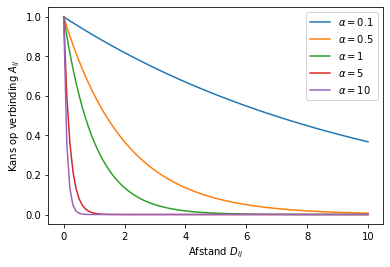

In [27]:
xwaarden = np.linspace(0, 10, 100)
plt.plot(xwaarden, np.exp(-0.1 * xwaarden), label=r"$\alpha=0.1$")
plt.plot(xwaarden, np.exp(-0.5 * xwaarden), label=r"$\alpha=0.5$")
plt.plot(xwaarden, np.exp(-1 * xwaarden), label=r"$\alpha=1$")
plt.plot(xwaarden, np.exp(-5 * xwaarden), label=r"$\alpha=5$")
plt.plot(xwaarden, np.exp(-10 * xwaarden), label=r"$\alpha=10$")
plt.xlabel(r"Afstand $D_{ij}$")
plt.ylabel(r"Kans op verbinding $A_{ij}$")
plt.legend(loc=0)

> **Vraag 3**: Wat als $\alpha=0$ is? Wat als $\alpha$ heel groot is?

In [15]:
def sample_verbindingsmatrix(D, alpha=1.0):
    # populatiegrootte
    n = D.shape[1]
    # we maken een matrix aan met true/false waarden
    # om de verbindingen voor te stellen
    A = np.zeros((n, n), bool)
    for i in range(n):
        for j in range(i+1, n):
            # kans op een verbinding
            p = np.exp(- alpha * D[i,j])
            # met een kans van p, maak een verbinding tussen i en j
            if p > np.random.rand():
                A[i,j] = True
                A[j,i] = True
    return A


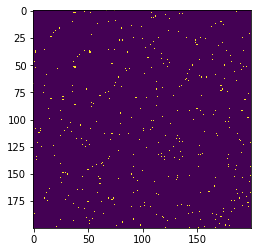

In [49]:
A = sample_verbindingsmatrix(D, alpha=10)
plt.imshow(A)

Laat ons het netwerk plotten. Hiervoor schrijven we een nieuwe python functie.

In [50]:
def plot_netwerk(X, A, ax, toestanden=None):
    n = A.shape[1]
    if toestanden is None:
        # geen toestanden gegeven, alle noden zijn blauw
        knoop_kleuren = "blue"
    else:
        kleur_map = {"S" : "yellow", "I" : "red", "R" : "green"}
        knoop_kleuren = [kleur_map[toestand] for toestand in toestanden]
    ax.set_axis_off()
    # plot de knopen
    ax.scatter(X[:,0], X[:,1], color=knoop_kleuren, zorder=1)
    # teken de verbindingen
    for i in range(n):
        for j in range(i+1, n):
            if A[i,j]:
                ax.plot(X[[i,j],0], X[[i,j],1], alpha=0.8, color="grey", zorder=0)
    ax.scatter([], [], color="yellow", label="S")
    ax.scatter([], [], color="red", label="I")
    ax.scatter([], [], color="green", label="R")
    ax.legend(loc=0)

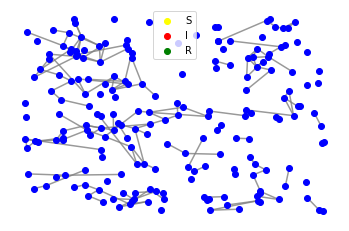

In [51]:
fig, ax = plt.subplots()

plot_netwerk(X, A, ax)

Laat ons nu aan elk van de knopen een toestand toekennen. Initieel is iedereen in toestand $S$ behalve vijf willekeurige personen die geïnfecteerd zijn.

In [52]:
n_inf = 5  # initieel aantal geïnfecteerden

initiele_toestanden = ["S"] * n
initiele_toestanden[0:n_inf] = ["I"] * n_inf  # maakt niet uit de welke

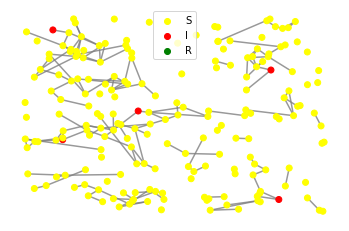

In [53]:
fig, ax = plt.subplots()

plot_netwerk(X, A, ax, initiele_toestanden)

We hebben dus een functie nodig die telkens van de toestand op tijdstip $t$ naar tijdstip $t+1$ gaat. Dit is een vrij complexe functie!

In [54]:
def update_toestand(toestanden, A, p_inf=1, p_res=0):
    n = len(toestanden)
    nieuwe_toestanden = []
    for i, toestand in enumerate(toestanden):
        if toestand == "S":  # persoon is vatbaar
            # tel aantal geinfecteerden die die persoon kent
            n_inf_kennissen = 0
            for j in range(n):
                if A[i,j] and toestanden[j] == "I":
                    n_inf_kennissen += 1
            # kans dat persoon i ziek wordt door een zieke kennis
            p_ziekte = 1 - (1 - p_inf)**n_inf_kennissen
            toestand = "I" if (p_ziekte > np.random.rand()) else "S"
            nieuwe_toestanden.append(toestand)
        elif toestand == "I":
            # persoon die geinfecteerd wordt kan resistent worden
            toestand = "R" if (p_res > np.random.rand()) else "I"
            nieuwe_toestanden.append(toestand)
        elif toestand == "R":
            # resistente personen blijven resisten
            nieuwe_toestanden.append("R")
        else:
            raise NotImplementedError("Toestanden moeten `S`, `I` of `R` zijn.")
    return nieuwe_toestanden

In [55]:
p_inf = 0.1
p_res = 0.01

nieuwe_toestanden = update_toestand(initiele_toestanden, A, p_inf, p_res)

print("aantal infecties op t=1:", nieuwe_toestanden.count("I"))

aantal infecties op t=1: 8


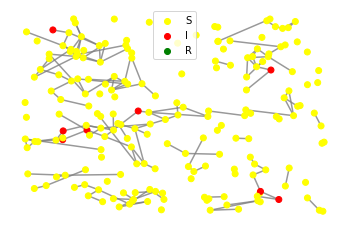

In [56]:
fig, ax = plt.subplots()

plot_netwerk(X, A, ax, nieuwe_toestanden)

We kunnen dit herhalen voor een hele reeks tijdstappen aan de hand van een for-lus.

In [57]:
def simuleer_epidemie(init_toestanden, A, tijdstappen, p_inf=1, p_res=0):
    # sla de toestanden op in een lijst van lijsten
    toestanden_lijst = [init_toestanden]
    toestanden = init_toestanden
    for t in range(tijdstappen):
        toestanden = update_toestand(toestanden, A, p_inf, p_res)
        toestanden_lijst.append(toestanden)
    return toestanden_lijst

Laat ons dit eens doen voor 100 tijdstappen.

In [58]:
simulatie = simuleer_epidemie(initiele_toestanden, A, 200, p_inf, p_res)

Laat ons nu eens naar enkele snapshots doorheen de tijd kijken.

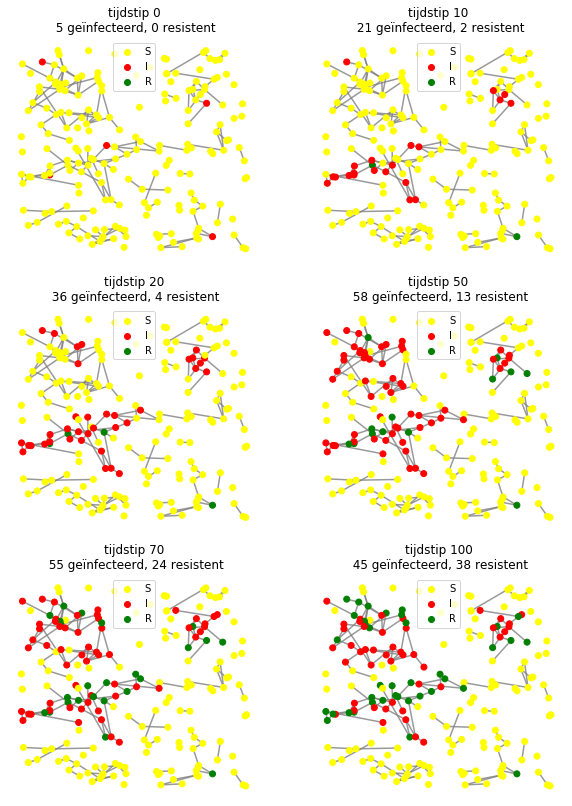

In [59]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 14))

for (ax, t) in zip(axes.ravel(), [0, 10, 20, 50, 70, 100]):
    toestanden = simulatie[t]
    plot_netwerk(X, A, ax, toestanden)
    ax.set_title("tijdstip {}\n {} geïnfecteerd, {} resistent".format(
                        t, toestanden.count("I"), toestanden.count("R")))
    

We kunnen de progressie makkelijker opvolgen aan de hand van een grafiek. Laat ons eens kijken hoe de verhouding vatbaren/geïnfecteerden/resitenten wijzigt doorheen de tijd.

In [60]:
def plot_progressie(toestanden_lijst, ax):
    tijdstappen = len(toestanden_lijst)
    # tel het aantal personen voor elke toestand per tijdstap
    S = [toestanden.count("S") for toestanden in toestanden_lijst]
    I = [toestanden.count("I") for toestanden in toestanden_lijst]
    R = [toestanden.count("R") for toestanden in toestanden_lijst]
    ax.stackplot(range(tijdstappen), I, S, R,
                    labels=["I", "S", "R"], colors=["red", "yellow", "green"])
    ax.legend(loc=0)
    ax.set_xlabel("Tijd")
    ax.set_ylabel("Aantal personen")


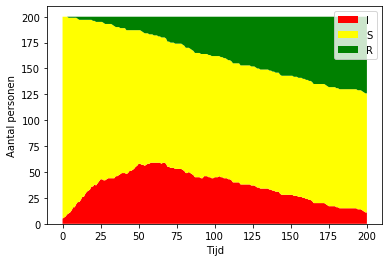

In [61]:
fig, ax = plt.subplots()

plot_progressie(simulatie, ax)

> **Oefening 3**: Indien er te snel te veel mensen ziek worden kan het gezondheidsapparaat overrompeld worden, met catastrofalse gevolgen! Om dit te vermijden wordt er het principe van *social distancing* toegepast: mensen moeten sociaal contact zo veel mogelijk vermijden. Dit zorgt er voor dat de ziekte trager wordt doorgegeven. Je kan social distancing simuleren door $\alpha$ hoger te zetten, bv. op 25. Doe dit. Zie je waarom het resultaat *flatten-the-curve*-effect noemt?

TO DO:
- [ ] figuren met transities
- [ ] oefening kuddeimmuniteit (initieel aantal resitenten)
- [ ] oefening met social distancing